Pokemons with spawn rate less than 5 percent:
           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]

Pokemons with less than 4 weaknesses:
           name                            weaknesses
0     Bulbasaur  ['Fire', 'Ice', 'Flying', 'Psychic']
1       Ivysaur  ['Fire', 'Ice', 'Flying', 'Psychic']
2      Venusaur  ['Fire', 'Ice', 'Flying', 'Psychic']
3    Charmander           ['Water', 'Ground', 'Rock']
4    Charmeleon           ['Water', 'Ground', 'Rock']
..          ...                                   ...
146     Dratini            ['Ice', 'Dragon', 'Fairy']
147   Dragonair            ['Ice', 'Dragon', 'Fairy']
148   Dragonite    ['Ice', 'Rock', 'Dragon', 

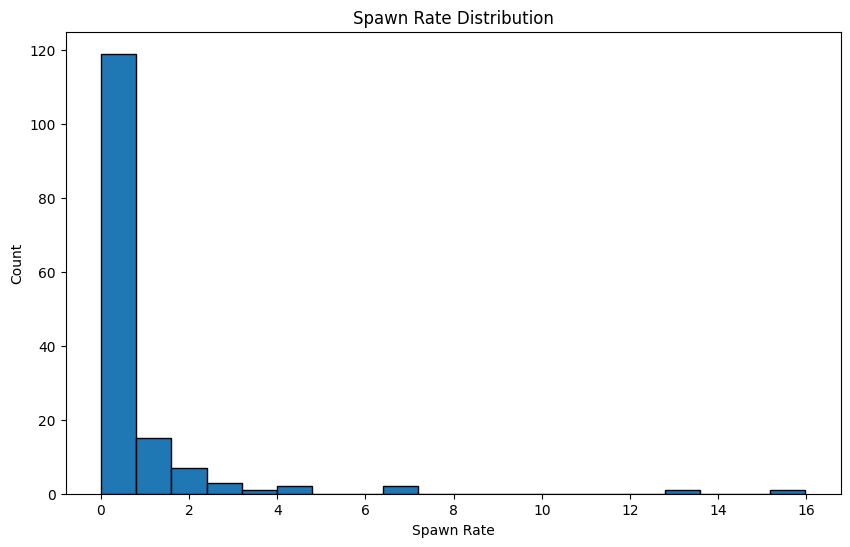

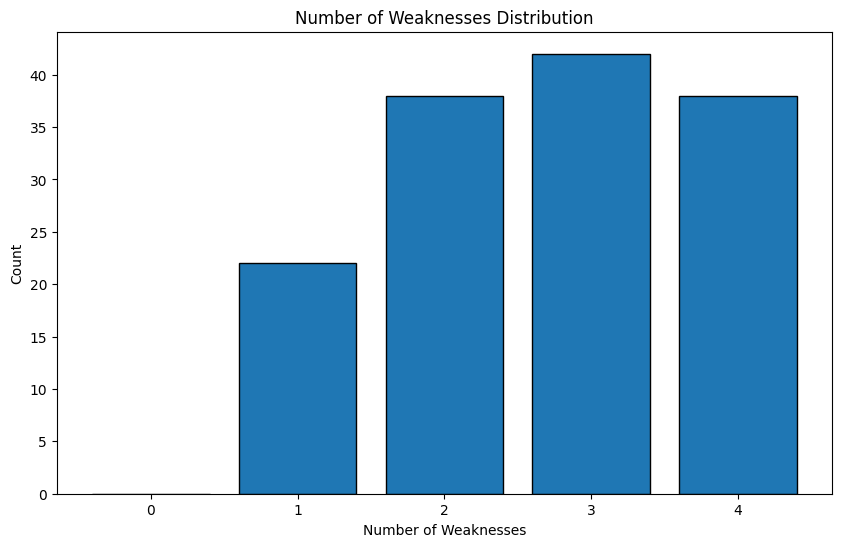

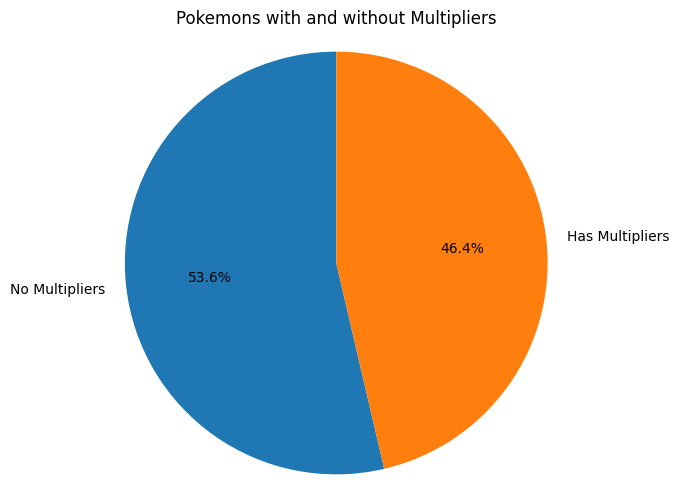

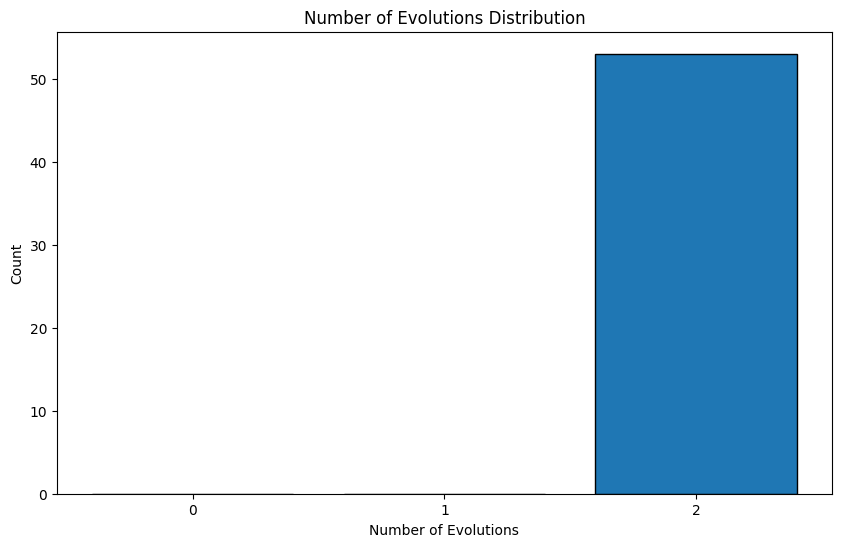

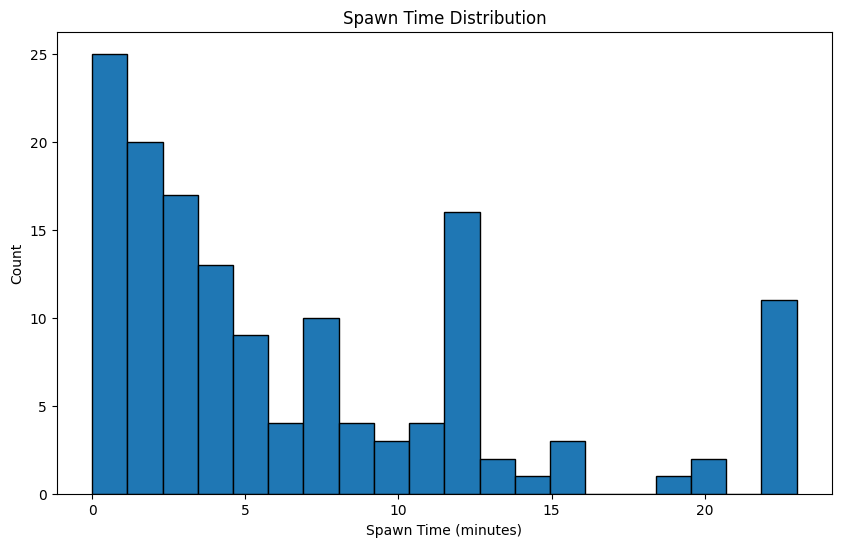

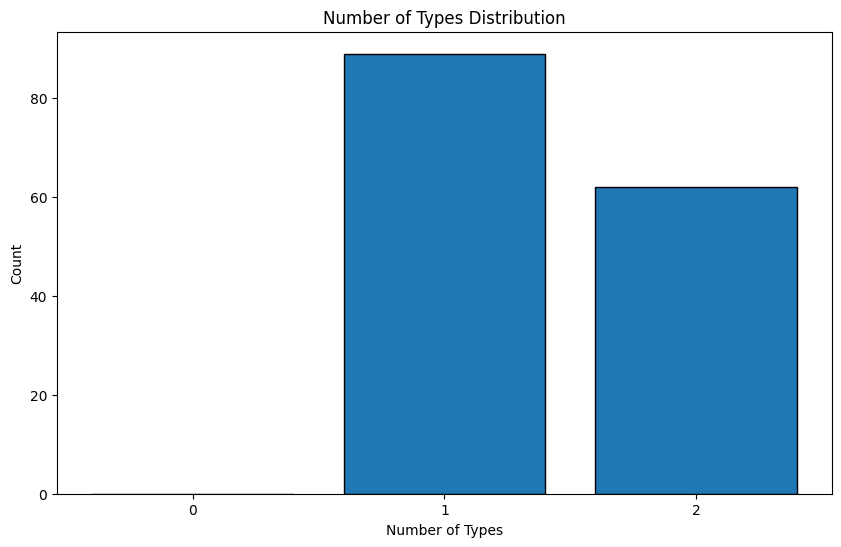

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
excel_file = "pokemon_data.xlsx"
df = pd.read_excel(excel_file)

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
spawn_rate_less_than_5 = df[df['spawn_chance'] < spawn_rate_threshold]
print("Pokemons with spawn rate less than", spawn_rate_threshold, "percent:")
print(spawn_rate_less_than_5[['name', 'spawn_chance']])
print()

# Get all Pokemons that have less than 4 weaknesses
weaknesses_threshold = 4
less_than_4_weaknesses = df[df['weaknesses'].str.count(',') < weaknesses_threshold]
print("Pokemons with less than", weaknesses_threshold, "weaknesses:")
print(less_than_4_weaknesses[['name', 'weaknesses']])
print()

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df['multipliers'].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers[['name', 'multipliers']])
print()

# Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
less_than_2_evolutions = df[df['next_evolution'].str.count(',') < max_evolutions]
print("Pokemons with less than", max_evolutions, "evolutions:")
print(less_than_2_evolutions[['name', 'next_evolution']])
print()

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = '05:00'
spawn_time_less_than_300 = df[df['spawn_time'] < spawn_time_threshold]
print("Pokemons with spawn time less than", spawn_time_threshold, "minutes:")
print(spawn_time_less_than_300[['name', 'spawn_time']])
print()

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['type'].str.count(',') > 1]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types[['name', 'type']])
print()

# Plot the spawn rate distribution
plt.figure(figsize=(10, 6))
plt.hist(df['spawn_chance'], bins=20, edgecolor='black')
plt.xlabel('Spawn Rate')
plt.ylabel('Count')
plt.title('Spawn Rate Distribution')
plt.show()

# Plot the number of weaknesses distribution
weakness_counts = df['weaknesses'].str.count(',') + 1
plt.figure(figsize=(10, 6))
plt.hist(weakness_counts, bins=range(0, weaknesses_threshold+2), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Number of Weaknesses Distribution')
plt.xticks(range(0, weaknesses_threshold+1))
plt.show()

# Pie chart for Pokemons with no multipliers
labels = ['No Multipliers', 'Has Multipliers']
sizes = [len(no_multipliers), len(df) - len(no_multipliers)]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pokemons with and without Multipliers')
plt.axis('equal')
plt.show()

# Plot the evolution count distribution
evolution_counts = df['next_evolution'].str.count(',') + 1
plt.figure(figsize=(10, 6))
plt.hist(evolution_counts, bins=range(0, max_evolutions+2), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Number of Evolutions')
plt.ylabel('Count')
plt.title('Number of Evolutions Distribution')
plt.xticks(range(0, max_evolutions+1))
plt.show()

# Convert spawn time to minutes
df['spawn_time_minutes'] = pd.to_datetime(df['spawn_time'], format='%M:%S').dt.minute

# Plot the spawn time distribution
plt.figure(figsize=(10, 6))
plt.hist(df['spawn_time_minutes'], bins=20, edgecolor='black')
plt.xlabel('Spawn Time (minutes)')
plt.ylabel('Count')
plt.title('Spawn Time Distribution')
plt.show()

# Plot the type count distribution
type_counts = df['type'].str.count(',') + 1
plt.figure(figsize=(10, 6))
plt.hist(type_counts, bins=range(0, type_counts.max()+2), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Number of Types')
plt.ylabel('Count')
plt.title('Number of Types Distribution')
plt.xticks(range(0, type_counts.max()+1))
plt.show()
